In [16]:
# importação das bibliotecas
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

#registro de converster para o uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [11]:
# Conversão dos atributos que estao no formato string para o formato ANO-MES
df = pd.read_csv('AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
df = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                 index_col = 'Month', date_parser=dateparse)

ts = df['#Passengers']

/tmp/ipykernel_26349/2885845781.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],


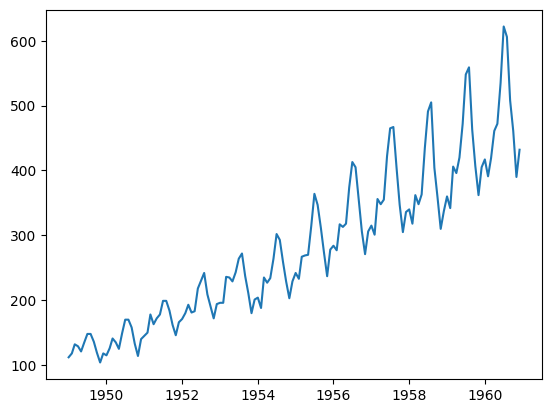

In [12]:
# Visualização da série temporal completa
plt.plot(ts)

In [26]:
# Criação do modelo ARIMA com parametro p=2, q=1, d=2. treinamento e visualização dos resultados
modelo = ARIMA(ts, order=(2, 1, 2), freq=ts.index.inferred_freq)
modelo_treinado = modelo.fit()
modelo_treinado.summary()

/home/nikola/MeuLab/MeuLab/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nikola/MeuLab/MeuLab/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Mon, 24 Apr 2023   AIC                           1353.347
Time:                        20:28:48   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.060      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.832      0.000      -2.087      -1.600
ma.L2          0.9953      0.135      7.391      0.000       0.731       1.259
sigma2       665.9617    113.945      5.845      0.000     442.634     889.290
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# Previsões de 12 datas no futuro
previsoes = modelo_treinado.forecast(steps = 12)[0]
previsoes

1961-01-01    439.854827
1961-02-01    465.296536
1961-03-01    500.666174
1961-04-01    535.971762
1961-05-01    561.689750
1961-06-01    571.313590
1961-07-01    562.973164
1961-08-01    539.730057
1961-09-01    508.528781
1961-10-01    478.147639
1961-11-01    456.747287
1961-12-01    449.696653
Freq: MS, Name: predicted_mean, dtype: float64

1960-01-01    398.194893
1960-02-01    424.817226
1960-03-01    416.246149
1960-04-01    452.658779
1960-05-01    492.452106
                 ...    
1964-09-01    500.122682
1964-10-01    488.386020
1964-11-01    482.025730
1964-12-01    482.515250
1965-01-01    489.413219
Freq: MS, Name: predicted_mean, Length: 61, dtype: float64

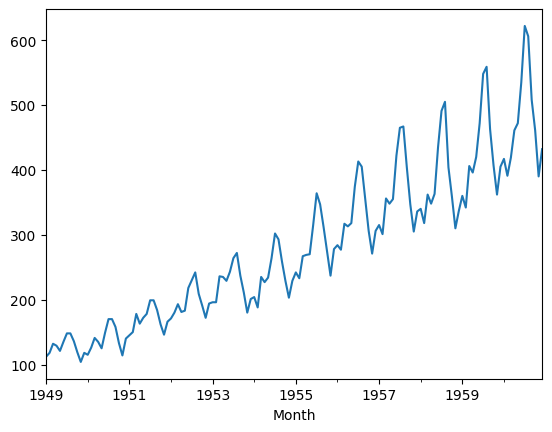

In [51]:
# erro no plot_predict
eixo = ts.plot()
modelo_treinado.predict('1960-01-01', '1965-01-01', ax = eixo, plot_in_sample = True)

In [45]:
modelo_auto = auto_arima(ts, m=12, seasonal=True, trace=False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Mon, 24 Apr 2023   AIC                           1017.847
Time:                                     20:55:44   BIC                           1029.348
Sample:                                 01-01-1949   HQIC                          1022.520
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3133     14.556      8.884      0.000     100.783     157.844
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
proximos_12 = modelo_auto.predict(n_periods=12)

proximos_12

1961-01-01    445.635047
1961-02-01    420.395210
1961-03-01    449.198597
1961-04-01    491.840277
1961-05-01    503.394845
1961-06-01    566.862848
1961-07-01    654.260595
1961-08-01    638.597923
1961-09-01    540.884188
1961-10-01    494.127074
1961-11-01    423.333167
1961-12-01    465.508037
Freq: MS, dtype: float64

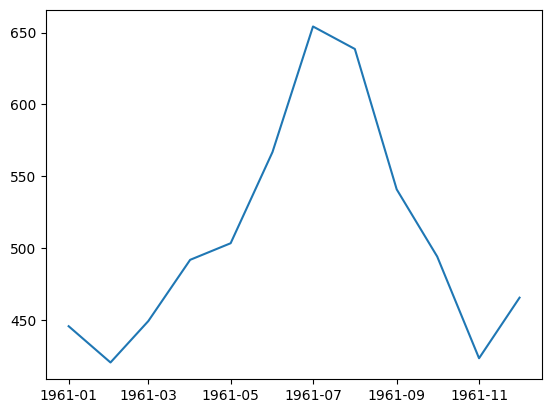

In [48]:
plt.plot(proximos_12)